In [1]:

# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1, 1)

<Figure size 432x288 with 0 Axes>

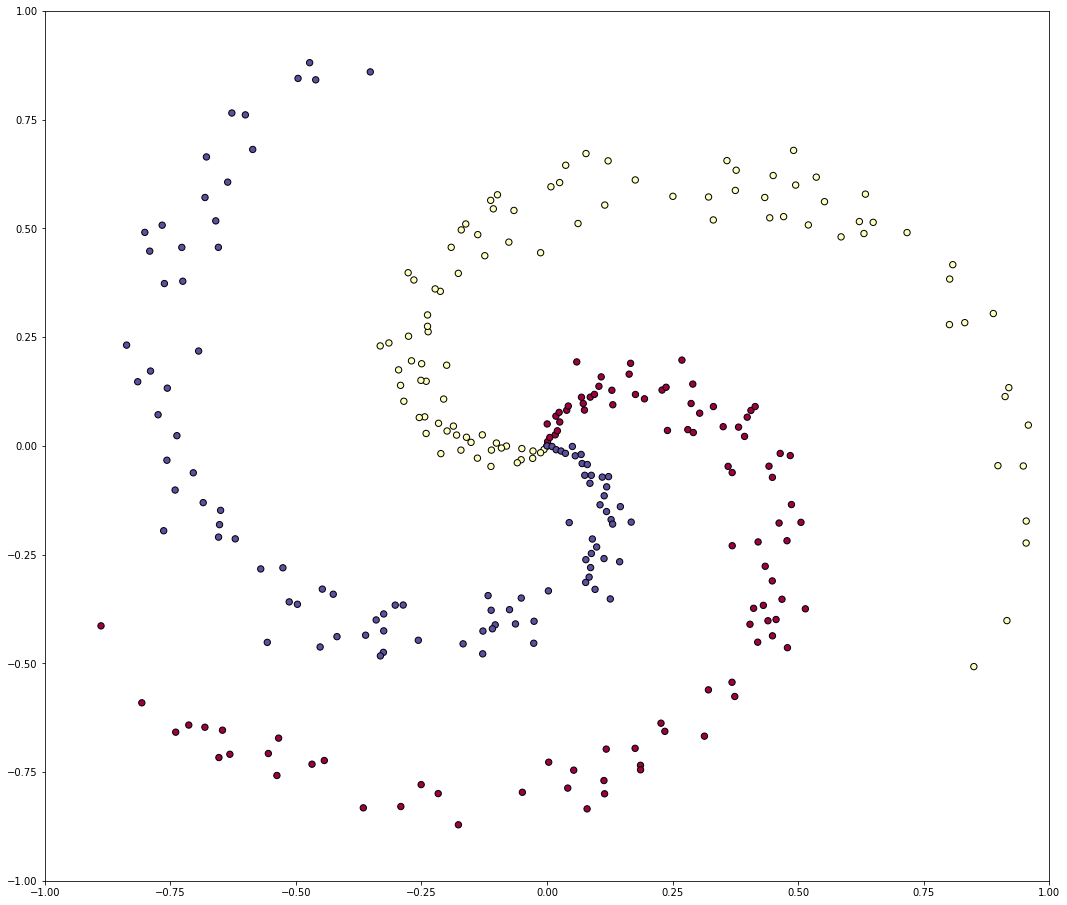

In [2]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.figure(figsize=(18,16))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgecolors='k', cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [3]:

h = 100 #No.ofneurons

W = 0.01 * np.random.randn(D,h) #Dimension of weights is (2,100)

b = np.zeros((1,h)) #Dimensions (1,100)

W2 = np.random.randn(h,K) #Dimensions (100,3)

b2 = np.zeros((1,K)) #Dimensions (1,3)

In [4]:
step_size=1e-0 #Noise to prevent overfitting
reg=1e-3
no_of_examples=300
for i in range(10000):
    
    #FWD. PROPAGATION
    #(1) Generate class scores
    hidden_layers = np.maximum(0,np.dot(X,W) + b) 
    #output
    scores = np.dot(hidden_layers,W2) +b2  #(300,3)
    
    #(2) Compute class probablities
    exp_scores=np.exp(scores) #(300,3)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True) #(300,3)
    
    #(3) Calculate Loss = -log(y^)
    correct_logprops = -np.log( probs[range(no_of_examples),y]) #(300,1)
    data_loss = np.sum(correct_logprops) / no_of_examples #(300)
    
    #(4) Regularization
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss=data_loss + reg_loss
    
    if i%1000==0:
        print(f"iter {i}: loss {loss}")
        
    #BACK PROPAGATION
    
    #(1) Gradient of Loss(y^ - y)
    dscores = probs #(300,3)
    dscores[range(no_of_examples),y]-=1
    dscores/=no_of_examples #(300,3)
    
    #(2) Update W2,b2 (Backprop into params W2,b2)
    dW2 = np.dot(hidden_layers.T, dscores) #(100,3)
    db2 = np.sum(dscores,axis=0, keepdims=True) #(1,3)
    
    #(3a) Backprop into hidden layer
    dhidden=np.dot(dscores,W2.T)
    dhidden[hidden_layers <= 0] = 0
    #(3b) Backdrop into W,b
    dW = np.dot(X.T,dhidden) #(2,100)
    db = np.sum(dhidden, axis=0, keepdims=True) #(1,100)
    
    dW2+=reg*W2
    dW+=reg*W
    
    #(4) Update rule
    W -= step_size * dW
    b -= step_size * db
    W2 -= step_size * dW2
    b2 -= step_size * db2

iter 0: loss 1.2621665765049108
iter 1000: loss 0.30098854522711405
iter 2000: loss 0.26138338811721007
iter 3000: loss 0.2527972923233987
iter 4000: loss 0.25111392126455556
iter 5000: loss 0.2505768818359645
iter 6000: loss 0.25069375248311077
iter 7000: loss 0.250904105338226
iter 8000: loss 0.2503834632123929
iter 9000: loss 0.25078906770661735


In [5]:
hidden_layers=np.maximum(0,np.dot(X,W)+b)
scores = np.dot(hidden_layers, W2) + b2
predicted_class = np.argmax(scores,axis=1)
np.mean(predicted_class == y) *100

97.66666666666667

(-1.8712034092398278, 1.8687965907601756)

<Figure size 432x288 with 0 Axes>

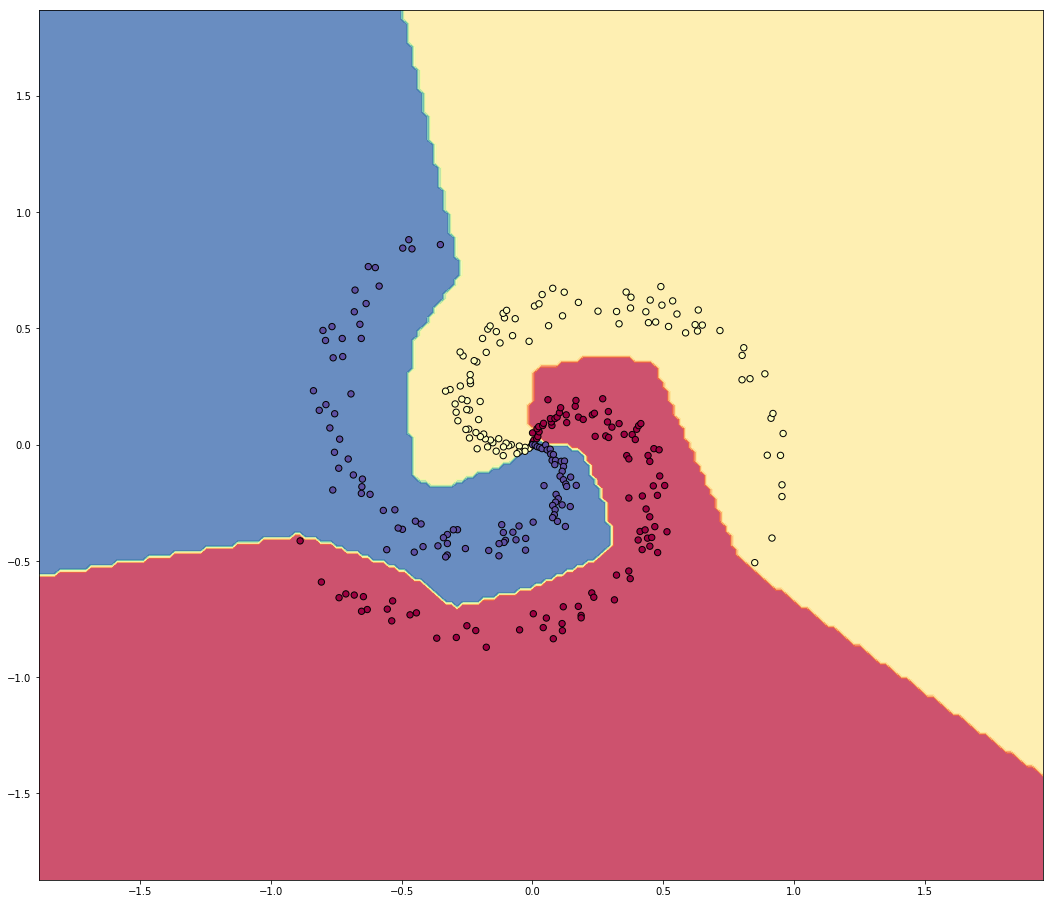

In [6]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.figure(figsize=(18,16))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgecolors='k', cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')